#  CS 247 : Advanced Data Mining Learning
## Homework 2

### Due: 11:59 pm 01/30

##### Please read the Homework Guidance (uploaded to BruinLearn) carefully and make sure you fulfill all the requirements.



## Problem 1: Kmeans Algorithm (30 pts)




Consider the Kmeans algorithm introduced in lecture 03 - K-Means and Mixture Model (please refer to page 9-18). In this problem, you are going to apply it on on a synthetic dataset.

### Part 1: Sklearn Implementation (10 pts)

In this part, you are going to work on the clustering task on the synthetic dataset using the KMeans function implemented in the sklearn package. We've provided the data processing parts, please implememt the code for training and testing. Please use the variable name **syn_y_pred** for your predicted results.


Hint:
1. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html to get familiar with the make_blobs function we used to generate synthetic dataset.
2. You can refer to https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html to get familiar with the sklearn KMeans function.

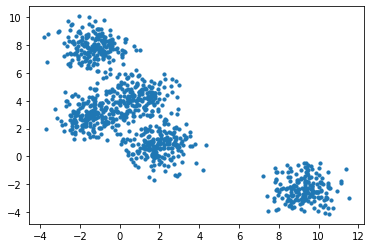

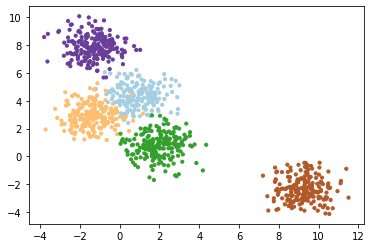

In [ ]:
# generate synthetic dataset 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial import distance 

# generate synthetic dataset
syn_X, syn_y = make_blobs(n_samples=1000, centers=5, random_state=0, cluster_std=0.85)

# Visualize the blobs as a scatter plot

plt.scatter(syn_X[:, 0], syn_X[:, 1], s=10, cmap=plt.cm.Paired)
plt.show()

# Visualize with the ground-truth cluster results

plt.scatter(syn_X[:,0], syn_X[:,1], c=syn_y, s=10, cmap=plt.cm.Paired)
plt.show()

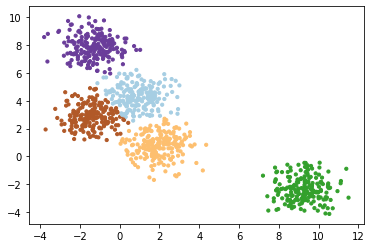

In [ ]:
# Identify the clusters using the sklearn K-Means algorithm.

from sklearn.cluster import KMeans

'''
    To Do:
    Please implement train and test using sklearn K-means function.
    You can play with different parameters to see how the results change, 
    but please use n_cluster = 5, max_iter = 100 to report your results
    Please use variable name syn_y_pred for your predicted results
'''

syn_y_pred = KMeans(n_clusters=5,max_iter=100, random_state=0).fit(syn_X)
plt.scatter(syn_X[:,0], syn_X[:,1], c=syn_y_pred.labels_, s=10, cmap=plt.cm.Paired)
plt.show()

### Part 2: Your Kmeans Implementation (20pts = 15 + 5)

In this part, you are going to implement your own KMeans function, and use it on the clustering task on the synthetic dataset we generated before. Please use the variable name __my_syn_y_pred__ for your predicted results.

In [ ]:
def dist(a,b):
  return np.power((np.sum((a-b)**2)),0.5)

def my_KMeans(X, n_clusters, max_iter=100):

#     X: multidimensional data
#     k: number of clusters
#     max_iter: number of repetitions before clusters are established
    
#     Return: 1d numpy array containing class of each data point
    
    # '''
    #     To Do: 
    #     Please implement your own Kmeans function.
    # '''
  clusters = np.random.uniform(0,1,(n_clusters,2))


  lab = np.asarray([0 for i in range(len(X))])
  for i in range(max_iter):
    for j in range(len(X)):
      minn = 1e10
      for k in range(len(clusters)):
      
        temp = dist(X[j], clusters[k]) #compute distance
        if(temp<minn):
          minn = temp
          lab[j] = k # set label if nearest
    for j in range(len(clusters)):
      clusters[j] = np.mean(X[lab==j], axis=0) # find the new clusters by taking means
     
  return lab


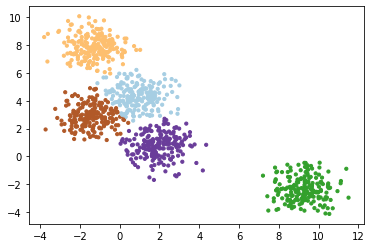

In [ ]:
# Identify the clusters using your own K-Means implementation.


'''
    To Do:
    Please implement train and test using your own K-means function.
    Please use n_cluster = 5, max_iter = 100 to report your results
'''


# Visualize with the predicted cluster results


my_syn_y_pred = my_KMeans(syn_X,5)
plt.scatter(syn_X[:,0], syn_X[:,1], c=my_syn_y_pred, s=10, cmap=plt.cm.Paired)
plt.show()

## Problem 2:  Gaussian Mixture Model (20 pts)

Let $\mathcal{N}(x|\mu,\sigma^2)$ be the density for a Gaussian distribution with mean $\mu$ and variance $\sigma^2$. For the problem description in the following, we follow the notations in lecture 03 - K-Means and Mixture Model page 26 - 39.

Consider a Gaussian mixture model, in which the probability density for an observation x is:
$$(1/4)\mathcal{N}(x|\mu, 1) + (3/4)\mathcal{N}(x|\mu, 4)$$
Please note that the two components have the same mean $\mu$, and their standard deviations are fixed at 1 and 2 respectively.

Now, let's estimate the parameter $\mu$ by maximum likelihood using the EM algorithm. Suppose we have three data data points: $1.0$, $4.0$, $3.0$.

Please answer the two questions in part 1 and part 2.

Hint: You may find the following table of standard normal probability densities useful:

| x         | 0    | 0.1  | 0.2  | 0.3  | 0.4  | 0.5  | 0.6  | 0.7  | 0.8  | 0.9  | 1.0  | 1.1  | 1.2  | 1.3  | 1.4  | 1.5  | 1.6  | 1.7  | 1.8  | 1.9  | 2.0 |
|-----------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|-----|
| N(x\|0,1) | .40  | .40  | .39  | .38  | .37  | .35  | .33  | .31  | .29  | .27  | .24  | .22  | .19  | .17  | .15  | .13  | .11  | .09  | .08  | .07  | .05 |

### Part 1: E-step (10pts)

Suppose the model parameter estimated from the previous M step is $\mu^t$ = 3. Then for the current E-step, compute all the $w^{t+1}_{ij}$ for $i\in\{1,2,3\}$ and $j\in\{1,2\}$. 

Reminder: $w^{t+1}_{ij} = p(z_i=j|\mu^t, x_i)$ indicates the probability that the i-th data point is assigned to cluster j.


Hint: 

1. Since the probabilities for the two components must add to one (i.e. $\sum_j w_{ij}=1$, once we have $w^{t+1}_{i1}$, we can quickly obtain $w^{t+1}_{i2} = 1 - w^{t+1}_{i1}$.
2. The normal density function with mean $\mu$ and variance $\sigma^2$ is $\mathcal{N}(x|\mu, \sigma^2) =(1/\sigma)\mathcal{N}(\frac{x − \mu}{\sigma}|0, 1)$. Also we have $\mathcal{N}(−x|0, 1) = \mathcal{N}(x|0, 1)$.


#### Write Your answer here:
![pic](https://drive.google.com/uc?export=view&id=1fvNiYjPmskYHkEMlYLVfQ-XBYt6z0_VY)
![pic](https://drive.google.com/uc?export=view&id=1ShVfJw3YmFuFE8zegGyGKdUazjO-3u0A)
![pic](https://drive.google.com/uc?export=view&id=1lmWDbWtWFOqvvI0hoAVpgpKZe0RVUeHf)
![pic](https://drive.google.com/uc?export=view&id=1Lw7CE2B0evx3MLf9DVGIgmxLWSrGRSA3)
<!-- https://drive.google.com/file/d//view?usp=sharing -->

<!-- https://drive.google.com/file/d//view?usp=sharing -->
<!-- https://drive.google.com/file/d//view?usp=sharing -->
<!-- https://drive.google.com/file/d//view?usp=sharing -->

### Part 2: M-step (10pts)

With your results in part 1, find the estimate for $\mu^{t+1}$ that will be found in the next M step. 

Hint: Since the two components share one parameter $\mu$ in this problem, we can not directly compute the updated $\mu^{t+1}$ with the formulas on slide page 35. You should first write down the expected likelihood for this problem, then take the derivative with respect to $\mu$, then setting the derivative to 0 and get the updated $\mu^{t+1}$.


#### Write Your answer here:
![pic](https://drive.google.com/uc?export=view&id=1Lw7CE2B0evx3MLf9DVGIgmxLWSrGRSA3)
![pic](https://drive.google.com/uc?export=view&id=1B2Akmme1Yo_N5FwZ8dMwP_6mwVEgcAWj)
![pic](https://drive.google.com/uc?export=view&id=1tmf_XMI5gqUeYG-YWY45_-cRBAXT-0Ky)


## Problem 3: Neural Networks (50 pts)

In this problem, you are goint to first implement a simple 2-layer NN classifier (with linear layers only), and appy it to synthetic dataset. Then, you are going to implement a 2-layer CNN classifier, and apply it to the CIFAR-10 dataset. You will have to use **pytorch**, which is a library for Python programs that facilitates building deep learning projects.

Before you start, you have to install pytorch on your device. You may find the following links helpful:
1. Pytorch Installation: https://pytorch.org/get-started/locally/
2. Pytorch Tutorial (A 60 minute blitz) that can help you quickly get familiar with Pytorch: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html


### Part 1: Toy example (10 pts)

In this part, you are going to implement a toy example, which is a simple **2-layer NN classifier** (with linear layers only), and appy it to synthetic dataset.



In [ ]:
# import neccessary libraries

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
  

In [ ]:
# define hyper-parameters

toy_learning_rate = 0.02
toy_epoch_num = 29

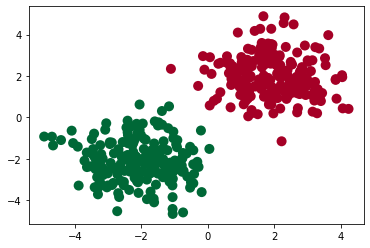

In [ ]:
# generate synthetic dataset and visualize it

torch.manual_seed(15) # fix random seed for reproducibility

n_data = torch.ones(200, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(200, 2)
y0 = torch.zeros(200)               # class0 y data (tensor), shape=(200, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(200, 2)
y1 = torch.ones(200)                # class1 y data (tensor), shape=(200, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (400, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (400,) LongTensor = 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


In [ ]:
# A two layer neural network

class toy_2_layer_NN(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        '''
            TODO: Implement __init__ function for this 2-layer NN 
        '''
        super(toy_2_layer_NN, self).__init__()
        self.n_feature = n_feature
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.fc1 = torch.nn.Linear(n_feature, n_hidden) 
        self.fc2 = torch.nn.Linear(n_hidden, n_output) 
    def forward(self, x):
        return self.fc2(self.fc1(x)) # forward through 2 linear layers
        '''
            TODO: Implement Forward Pass of this model
        '''
        


In [ ]:
# define the network, optimizer, and loss function

toy_net = toy_2_layer_NN(n_feature=2, n_hidden=10, n_output=2)     # define the network
toy_optimizer = torch.optim.SGD(toy_net.parameters(), lr=toy_learning_rate) # define the optimizer
toy_loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

print(toy_net) # print model architecture


toy_2_layer_NN(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)


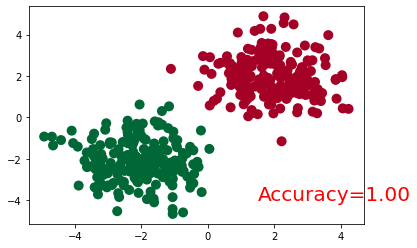

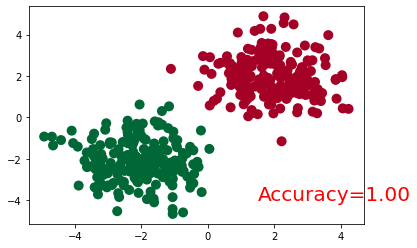

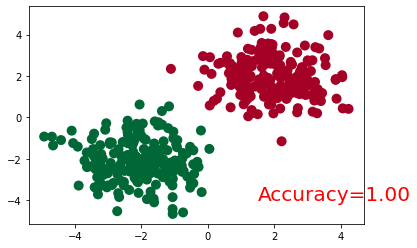

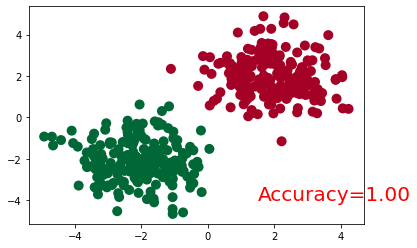

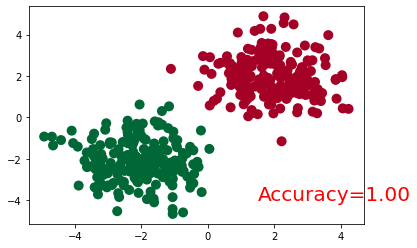

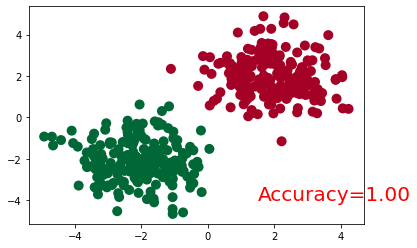

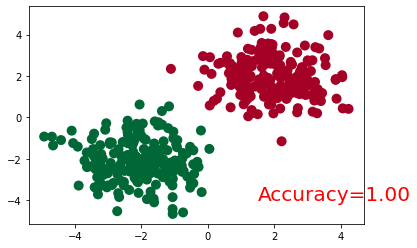

In [ ]:
# training
# you would be able to see how the prediction results and the training accuracy get updated
# in this toy example, we aim to help you get familiar with how a neural network is implemented and trained
# therefore, we do not include a test stage in this example
# in next part, you would be able to see the full process including training and testing

plt.ion()   # something about plotting

for epoch in range(toy_epoch_num):
    
    toy_optimizer.zero_grad()   # clear gradients for next train
    out = toy_net(x)                 # input x and predict based on x
    toy_loss = toy_loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted
    toy_loss.backward()         # backpropagation, compute gradients
    toy_optimizer.step()        # apply gradients

    if epoch % 4 == 1:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

### Part 2: CNN Classifier (20 pts = 10 + 5 + 5 )

In this part, you are goint to implement a **2-layer CNN classifier**, and apply it to the CIFAR-10 dataset. You can use the current parameters to test your implementation (since it takes less time to finish training), but your submission should report the results with the best parameter setting you found in Part 3.

You may find the following link helpful if you want to get familiar with the CIFAR-10 dataset:
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# import neccessary libraries

import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
import ssl
import torch.nn.functional as F
ssl._create_default_https_context = ssl._create_unverified_context
torch.manual_seed(10) # fix random seed for reproducibility
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# define hyper-parameters
torch.manual_seed(10)
learning_rate = 0.01
epoch_num = 40
batch_size = 32

In [ ]:
# load dataset, split into batches
torch.manual_seed(10)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


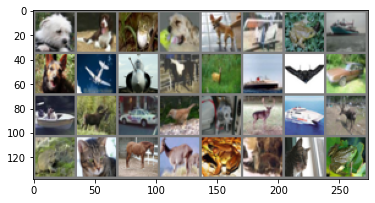

  dog   dog  frog   dog   dog plane  frog  ship   dog plane plane horse  deer  ship plane   car  ship  deer   car  bird   dog  deer  ship  deer  frog   cat horse  deer  frog  deer   cat  frog


In [ ]:
# visualize some examples in the dataset

torch.manual_seed(10)
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
# A 2-layer CNN

class CNN_Net(nn.Module):
    def __init__(self):
      
        super(CNN_Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x): #forward pass using layers defined in init function
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
        '''
            TODO: 
            Implement Forward Pass of this model
            Please use max pooling over a (2,2) window
        '''

In [ ]:
# define the network, optimizer, and loss function

cnn_net = CNN_Net().to(device)     # define the network
optimizer = torch.optim.SGD(cnn_net.parameters(), lr=learning_rate) # define the optimizer
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted
'''
    TO DO:
    define the network, optimizer, and loss function
    for optimizer, please use SGD
    for loss function, please use Cross Entropy Loss
    you are encouraged to but not required to output your network architecture
'''
print(cnn_net)

CNN_Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# Train the network
# loop over the data iterator, and feed the inputs to the network and optimize.
from tqdm.notebook import tqdm


loss_record = []

for epoch in tqdm(range(epoch_num)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        preds = cnn_net(inputs)

        loss = loss_func(preds,labels)
        loss.backward()
        optimizer.step()
        # clear gradients for next train
        running_loss += loss
        

        '''
            TO DO:
            forward, backward, optimize
        '''
    loss_record.append(running_loss/len(trainloader))    
    print("Loss = ",loss_record[-1])

print('Finished Training')

  0%|          | 0/40 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Loss =  tensor(1.9825, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.5937, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.4507, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.3758, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.3227, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.2814, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.2504, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.2237, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.2039, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1820, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1652, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1516, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1386, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1278, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1178, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1109, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.1003, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0946, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0876, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0835, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0784, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0722, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0681, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0633, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0593, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0548, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0524, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0483, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0459, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0408, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0382, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0366, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0323, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0308, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0282, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0254, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0240, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0222, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0200, device='cuda:0', grad_fn=<DivBackward0>)


0it [00:00, ?it/s]

Loss =  tensor(1.0171, device='cuda:0', grad_fn=<DivBackward0>)
Finished Training


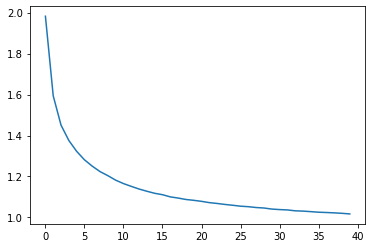

In [ ]:
# plot the loss curve

loss_record = np.array(loss_record)
plt.plot(loss_record)

In [ ]:
# test

correct = 0
total = 0
cnn_net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        '''
          TODO: Implement the code to predict with your
          trained net. Please use variable name "predicted"
          for your prediction results. And it should be a 1-d
          array with the same shape of labels.
        '''
        predicted = cnn_net(images)
        predicted = torch.argmax(predicted,axis = 1)
     
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


### Part 3: Tune your CNN (20 pts = 5 + 5 + 5 + 5)

Tune the hyper-parameters (learning_rate, epoch_num, batch_size) in part 2's second block. You are expected to get an accuracy on the test images > 60%.

Answer the following questions:

1. What is your best parameter settings? (Output from the previous cell, as long as you get >60% and report your parameter setting, you will get full points for this question)
2. How would learning rate affect the performance (accuracy and running time) of the network?
3. How would epoch number affect the performance (accuracy and running time) of the network?
4. How would batch_size affect the performance (accuracy and running time) of the network?


  0%|          | 0/5 [00:00<?, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with lr = 0.0001 : 28.56
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with lr = 0.001 : 51.56
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with lr = 0.01 : 61.8
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with lr = 0.05 : 57.93
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with lr = 0.1 : 54.72


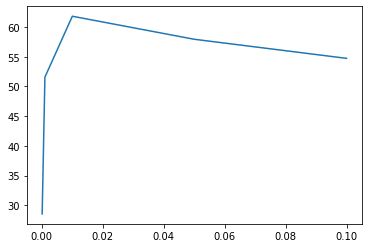

In [ ]:
# Variation of accuracy vs learning rate

lr_list = [1e-4,1e-3,1e-2,5*1e-2,1e-1]
batch_size = 32
epoch_num = 30
lr_acc = []
for p in tqdm(range(len(lr_list))):
  torch.manual_seed(10)
  transform = transforms.Compose(
      [transforms.ToTensor(),
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                           shuffle=False, num_workers=2)
  cnn_net = CNN_Net().to(device)     # define the network
  optimizer = torch.optim.SGD(cnn_net.parameters(), lr=lr_list[p]) # define the optimizer
  loss_func = torch.nn.CrossEntropyLoss() 
  classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
  loss_record = []

  for epoch in tqdm(range(epoch_num)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        preds = cnn_net(inputs)

        loss = loss_func(preds,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        

  cnn_net.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        '''
          TODO: Implement the code to predict with your
          trained net. Please use variable name "predicted"
          for your prediction results. And it should be a 1-d
          array with the same shape of labels.
        '''
        predicted = cnn_net(images)
        predicted = torch.argmax(predicted,axis = 1)
     
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  
  print('Accuracy with lr = '+str(lr_list[p]) +" : " + str(100 * correct / total))
  lr_acc.append(100 * correct / total)

lr_acc = np.array(lr_acc)
lr_list = np.array(lr_list)
plt.plot(lr_list, lr_acc)


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/60 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with epoch = 10 : 57.13


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with epoch = 20 : 60.96


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with epoch = 30 : 59.03


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with epoch = 40 : 61.65


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with epoch = 50 : 62.91


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with epoch = 60 : 62.54


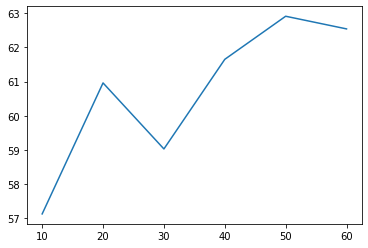

In [ ]:
# Variation of accuracy vs number of epochs  

epoch_list = [10,20,30,40,50,60]
lr1 = 0.01
batch_size = 32
epoch_num = 60
epoch_acc = []
# for p in tqdm(range(len(lr_list))):
torch.manual_seed(10)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
cnn_net = CNN_Net().to(device)     # define the network
optimizer = torch.optim.SGD(cnn_net.parameters(), lr=lr1) # define the optimizer
loss_func = torch.nn.CrossEntropyLoss() 
classes = ('plane', 'car', 'bird', 'cat',
         'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
loss_record = []
count = 0
for epoch in tqdm(range(epoch_num)):  # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in tqdm(enumerate(trainloader, 0)):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      preds = cnn_net(inputs)
      loss = loss_func(preds,labels)
      loss.backward()
      optimizer.step()
      running_loss += loss
      
  
  correct = 0
  total = 0
  if(epoch==epoch_list[count]-1):
    with torch.no_grad():
        cnn_net.eval()
        for data in testloader:
          images, labels = data
          images = images.to(device)
          labels = labels.to(device)
          '''
            TODO: Implement the code to predict with your
            trained net. Please use variable name "predicted"
            for your prediction results. And it should be a 1-d
            array with the same shape of labels.
          '''
          predicted = cnn_net(images)
          predicted = torch.argmax(predicted,axis = 1)

          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print('Accuracy with epoch = '+str(epoch_list[count]) +" : " + str(100 * correct / total))
    epoch_acc.append(100 * correct / total)
    count += 1

epoch_acc = np.array(epoch_acc)
epoch_list = np.array(epoch_list)
plt.plot(epoch_list, epoch_acc)


  0%|          | 0/5 [00:00<?, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with batch = 8 : 60.58
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with batch = 16 : 61.9
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with batch = 32 : 61.92
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with batch = 64 : 60.89
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/30 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Accuracy with batch = 128 : 59.05


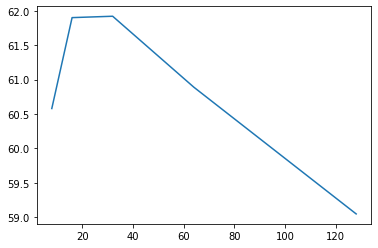

In [ ]:
# Variation of accuracy vs batch size

from tqdm.notebook import tqdm
batch_list = [8,16,32,64,128]
epoch_num = 30
lr = 0.01
batch_acc = []
for p in tqdm(range(len(batch_list))):
  torch.manual_seed(10)
  transform = transforms.Compose(
      [transforms.ToTensor(),
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_list[p],
                                            shuffle=True, num_workers=2)

  testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=batch_list[p],
                                           shuffle=False, num_workers=2)
  cnn_net = CNN_Net().to(device)     # define the network
  optimizer = torch.optim.SGD(cnn_net.parameters(), lr=lr) # define the optimizer
  loss_func = torch.nn.CrossEntropyLoss() 
  classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
  loss_record = []

  for epoch in tqdm(range(epoch_num)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        preds = cnn_net(inputs)

        loss = loss_func(preds,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        

  cnn_net.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        '''
          TODO: Implement the code to predict with your
          trained net. Please use variable name "predicted"
          for your prediction results. And it should be a 1-d
          array with the same shape of labels.
        '''
        predicted = cnn_net(images)
        predicted = torch.argmax(predicted,axis = 1)
     
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  
  print('Accuracy with batch = '+str(batch_list[p]) +" : " + str(100 * correct / total))
  batch_acc.append(100 * correct / total)

batch_acc = np.array(batch_acc)
batch_list = np.array(batch_list)
plt.plot(batch_list, batch_acc)


#### Write Your answer here:
1) I got a 61% accuracy at the settings , batch size = 32, epoch  = 40, learning rate = 0.01. Following is the traing loss curve for same:  
![pic](https://drive.google.com/uc?export=view&id=1FKgfl7n453_BoTDQoEfW5tUCy6KHU178)
 
In the previous 3 cells, I have conducted experiments for hyperparamter tuning. 

2) As can be seen, from output of accuracy vs learning rate hyperparameter tuning, it can be seen form the plot that as learning rate increases, the accuracy first increases and then drops. This is mainly because of the fact at very small learning rate, the model doesnt converge, and hence gives low test accuracy and at very high learning rate, the training will overshoot and miss the global minima leading to again por test accuracy. I tried this part using the learning rates of = 1e-4, 1e-3, 1e-2, 5*1e-2, 1e-1. For lr = 0.01, I got the maximum accuracy. I have kept the other parameters fixed at epoch number = 30 and batch size = 32. Furthermore, there is no affect on the running time if we vary the learning rate.  
![pic](https://drive.google.com/uc?export=view&id=1JMO4WAFwa-QZlQjc7DLsZyfg3tGXPu9x)

3) As can be seen, from output of accuracy vs epoch number hyperparameter tuning, it can be seen form the plot that as epoch number increases, the accuracy keeps increasing overall (starts decreasing little in end). However, in general, the accuracy would first increase and then would decrease. This is because, at very low epochs, the model wont converge to global minima and hence testing accuracy would be less. For a very high epoch number, the testing accuracy would again decrease since the model would overfit. If I would have increased the epoch number to 300+, we would have observed this effect. I tried this experiment using epoch = 10,20,30,40,50,60. I have kept the other parameters fixed at learning rate = 0.01 and batch size = 32. Furthermore, as we increase the epoch numbers, then the running time also increases (for loop range increases).   

![pic](https://drive.google.com/uc?export=view&id=1sGKnmGsRNvv4vXYOeZrZwhlhDI-UxyIg)

4) As can be seen, from output of accuracy vs batch size hyperparameter tuning, it can be seen form the plot that as batch increases, the accuracy first increases and then decreases. This can be understood from the fact that at very low batch sizes, there is lot of stochasticity introduced, since we are updating based on small number of samples only. For very large batch sizes, the accuracy also is decreased, since the model overfits on the data and its easily possible to get low test accuracy in such cases. A middle batch size =32 works the best in my case. I tried this experiment using batch size = 8.16.32.64.128. I have kept the other parameters fixed at learning rate = 0.01 and epoch number = 30. Furthermore, as we increase the batch size, then the running time decreases (since for loop range decreases, and parallel processing helps to process the complete batch at one time with little overhead).  
![pic](https://drive.google.com/uc?export=view&id=1HhcQtoS31pN9w2gdk9Aa8E5ekWByhxEx)


## Bonus Problem: Backpropagation (10 pts)

Slides P32-36 gives a toy example of how to use backpropagation to compute the gradients for the parameters of a 3-layer MLP with MSE loss function. In this problem, we will consider the same neural network and use the same notations, but replace __MSE loss__ with __Cross Entropy Loss__.

Specifically, let $\mathbf{x}^{(0)}$ be the input features, $\mathbf{x}^{(l)}$ be the output of $l$-th layer, $\mathbf{z}^{(l)}$ be the intermediate result of $l$-th layer, $\mathbf{W}^{(l)}$ and $\mathbf{b}^{(l)}$ be the weight and bias of the $l$-th layer, i.e., $\mathbf{z}^{(l)}=\mathbf{W}^{(l)}\mathbf{x}^{(l-1)}+\mathbf{b}^{(l)}$, $\mathbf{x}^{(l)}=f^{(l)}(\mathbf{z}^{(l)})$. 

Let vector $\mathbf{y}$ be the ground-truth label of $\mathbf{x}$, $y_i=1$ if $\mathbf{x}$ belongs to the $i$-th class, otherwise $y_i=0$. $\mathbf{x}^{(3)}$ is the output of our MLP and $f^{(3)}$ is the cross-entropy function, i.e., $x^{(3)}_i=\frac{\exp(z^{(3)}_i)}{\sum_j\exp(z^{(3)}_j)}$. The cross entropy loss is $L=-\sum_{i}y_i\ln(x^{(3)}_i)$.



### Part 1 (2 pts)

Prove that $\frac{\partial x^{(3)}_i}{\partial z^{(3)}_i}=x^{(3)}_i(1-x^{(3)}_i)$

#### Write Your answer here:
![pic](https://drive.google.com/uc?export=view&id=17E-l4XFX60hjAIVrO47ituKpi-4fpw6g)
![pic](https://drive.google.com/uc?export=view&id=1FyqOgEaf_d4oAtiWSPpW9LGkhCoi8Xqu)



### Part 2 (6 pts)
Let $\delta_i^{(l)}=\frac{\partial L}{\partial z_i^{(l)}}$. Prove that $\delta_i^{(3)}=x_i^{(3)}-y_i$


Hint:

1. Start from $\delta_i^{(3)}=\sum_j\frac{\partial L}{\partial x_j^{(3)}}\frac{\partial x_j^{(3)}}{\partial z_i^{(3)}}$

2. Prove that when $j\ne i$, $\frac{\partial x_j^{(3)}}{\partial z^{(3)}_i}=-x^{(3)}_ix^{(3)}_j$

#### Write Your answer here:
![pic](https://drive.google.com/uc?export=view&id=1jIF75ACbvRwflkVATJQwY1SO2cnHNwhO)
![pic](https://drive.google.com/uc?export=view&id=11QljTe8BuhRGPBQFi0VF90wRhVzJw4JM)
![pic](https://drive.google.com/uc?export=view&id=1UY63qwmWmYritbcNWXdDyBWaaSRivJXi)



### Part 3 (2 pts)
Use the results above to derive the expression of $\frac{\partial L}{\partial W_{jk}^{(3)}}$ and $\frac{\partial L}{\partial b_{k}^{(3)}}$. Show your steps.

#### Write Your answer here:
![pic](https://drive.google.com/uc?export=view&id=1gXcQJ8W_0dcuKWo-tCvJkr0VDixQ-65k)
![pic](https://drive.google.com/uc?export=view&id=1F_2N8VVPb-atDiQALmm2xNTzEkl_5jeP)
